<br><br>
<span style="font-size:2em;font-weight:lighter;">194.025 Introduction to Machine Learning</span><br>
<span style="font-size:3em;font-weight:normal;line-height:70%;">Assignment 9: Your very own Neural Network</span>

---



Welcome to the 9th assignment of our course **Introduction to Machine Learning**. You will be able to earn up to a total of 10 points. Please read all descriptions carefully to get a full picture of what you have to do. 

**Remark:** Some code cells are put to read-only. Please execute them regardless as they contain important code. You can run a jupyter cell by pressing `SHIFT + ENTER`, or by pressing the play button on top (in the row where you can find the save button). Cells where you have to implement code contain the comment `# YOUR CODE HERE` followed by `raise NotImplementedError`. Simply remove the `raise NotImplementedError`and insert your code.

Some other code cells start with the comment `# hidden tests ...`. Please do not change them in any way as they are used to grade the tasks after your submission.

**NOTE**: in order for the automated tests to work correctly, please **do not** create any variable/function/class name beginning with a leading underscore, e.g., `_my_variable` or with the word 'solution', e.g., `solution_variable`.

For this assignment, you will be tasked to implement and train a multi-layer perceptron. This also includes all of the surrounding components such as activation function, loss function, and, of course, the training algorithm.

In [57]:
# Load packages
import random

import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as dt

from sklearn.model_selection import train_test_split

# Display figure in the notebook
%matplotlib inline

## First components of the Network

In this section, you will have to implement three different activation functions (_Sigmoid_, _Tanh_, and _ReLU_). Please note that the method _forward()_ is the basic function, while the method _backward()_ should be used for the derivative of the function.

Additionally, you will have to implement the _Mean Squared Error_ loss functi. $$.

You can use any functionality that is part of NumPy.

#### Sigmoid, TanH and ReLU (1.5 Points)

In the first task, we will look at common activation functions. As a reminder, here are the functions that you have to implement:

**Sigmoid**

$$Sigmoid(x) = \frac{1}{1 + e^{-x}}$$


**Tangens Hyperbolicus** 

$$TanH(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

**Rectified Linear Unit**

$$ReLU(x) = \max(0,x)$$

In [58]:
class Sigmoid():
    def forward(self, x):
        # this is the function as above
        # YOUR CODE HERE
        return 1/(1 + np.exp(-x))

    def backward(self, x):
        # derivative of the function with respect to the input
        # YOUR CODE HERE
        sigmoid = 1/(1 + np.exp(-x))
        return sigmoid * (1 - sigmoid)

In [59]:
class TanH():
    def forward(self, x):
        # this is the function as above
        # YOUR CODE HERE
        return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

    def backward(self, x):
        # derivative of the function with respect to the input
        # YOUR CODE HERE
        return (2 / (np.exp(x) + np.exp(-x)))**2

In [60]:
class ReLU():
    def forward(self, x):
        # this is the function as above
        # YOUR CODE HERE
        return np.maximum(0, x)

    def backward(self, x):
        # derivative of the function with respect to the input
        # YOUR CODE HERE
        return np.where(x > 0, 1, 0)  # Fix: Element-wise derivative calculation

To visualise the different activation functions and their respective derivatives, simply run the code block below.

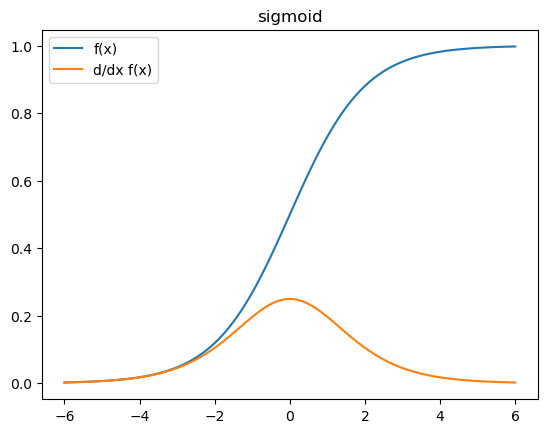

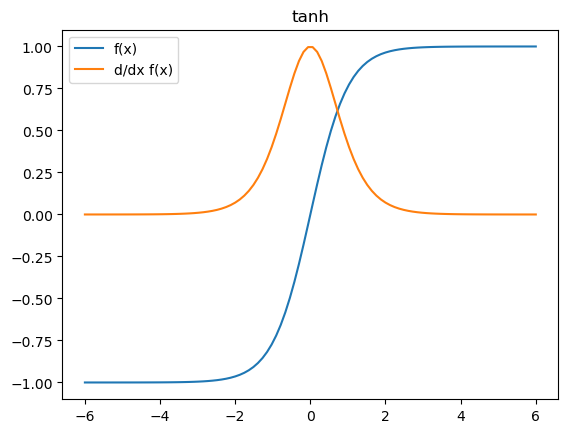

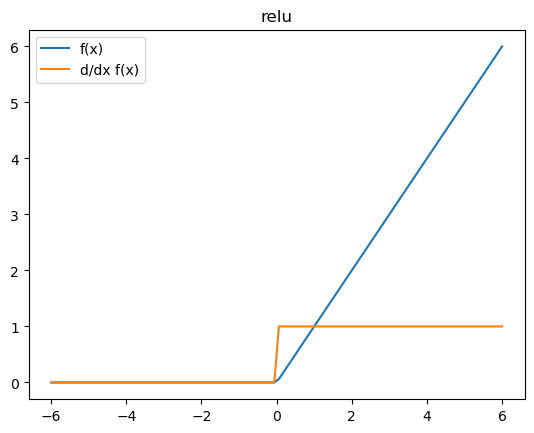

In [61]:
# Plotting activation functions and their derivatives
def plot_fn(x, fn, fn_name=""):
    y = fn.forward(x)
    dy = fn.backward(x)

    plt.plot(x, y, label="f(x)")
    plt.plot(x, dy, label="d/dx f(x)")
    plt.title(fn_name)
    plt.legend()
    plt.show()

x = np.linspace(-6, 6, 100)
for fn, name in zip([Sigmoid(), TanH(), ReLU()], ["sigmoid", "tanh", "relu"]):
    plot_fn(x, fn, name)

In [62]:
# hidden tests - DO NOT CHANGE THIS CELL

In [63]:
# hidden tests - DO NOT CHANGE THIS CELL

#### Loss Function (0.5 Points)

Now we also need to implement the loss function (otherwise, our network will not be able to learn anything). The function is defined as follows:

$$ MSE = \frac{1}{N} \sum^{N}_{i=1} (y_i - \hat{y_i})^2 $$.

In [64]:
class MSE():
    def forward(self, y_pred, y_true):
        # this is the function as above
        # YOUR CODE HERE
        n = len(y_true)
        return (1 / n) * np.sum((y_true - y_pred) ** 2)

    def backward(self, y_pred, y_true):
        # derivative of the function with respect to the input
        # YOUR CODE HERE
        n = len(y_true)
        return (-2 / n) * (y_true - y_pred) 

In [65]:
# hidden tests - DO NOT CHANGE THIS CELL

#### Multi-Layer Perceptron (4 points)

In this section, you will have to implement your very own _Multi-Layer Perceptron_. For the network architecture, we will consider only one hidden layer and **no activation function for the output neuron** (i.e. apply the activation function to the hidden layer but not to the output layer).

_Hint: You will need to compute the derivatives $\frac{\partial L}{\partial W^o}, \frac{\partial L}{\partial b^o}, \frac{\partial L}{\partial W^h}$ and $\frac{\partial L}{\partial b^h}$ (using the chain rule) as they are required for the backward pass._

In [122]:
class MLP():

    def __init__(self, input_size, hidden_size, output_size, activation_func):
        """
        Parameters
        ----------
        input_size:
            dimensionality of input vector
        hidden_size:
            dimensionality of hidden vectors (pre-activation and activation)
        output_size:
            dimensionality of output vector
        activation_func:
            activation function of your choice

        Your class must contain the following class variables
        -----------------------------------------------------
        W_h: 
            weight matrix from input layer to hidden layer with size (hidden_size, input_size)
        b_h: 
            bias vector for the hidden layer with size (hidden_size, 1)
        W_o: 
            weight matrix from hidden layer to output layer with size (output_size, hidden_size)
        b_o: 
            bias vector for the hidden layer with size (output_size, 1)
        activation_func: 
            activation function according to the input parameter
        """
        # YOUR CODE HERE
        # raise NotImplementedError()

        self.W_h = np.random.randn(hidden_size, input_size) * 0.01
        self.b_h = np.zeros((hidden_size, 1))
        self.W_o = np.random.randn(output_size, hidden_size) * 0.01
        self.b_o = np.zeros((output_size, 1))

        self.activation_func = activation_func

    def forward(self, x):
        """
        forward pass of the MLP
        Note: no activation function is applied to the output layer

        Parameters
        ----------
        x:
            input vector of size (input_size, 1)

        Returns
        -------
        y:
            output vector of size (output_size, 1)
        """
        # YOUR CODE HERE

        h = self.activation_func.forward(self.W_h @ x + self.b_h)  # Hidden activations
        y = self.W_o @ h + self.b_o  # Output (no activation applied)
        return y

    def forward_(self, x):
        """
        forward pass of the MLP with additional return values
        Note: no activation function is applied to the output layer

        Paramaters
        ----------
        x:
            input vector of size (input_size, 1)

        Returns
        -------
        y:
            output vector of size (output_size, 1)
        a:
            activation of the hidden layer of size (hidden_size, 1)
        s:
            pre-activation of the hidden layer of size (hidden_size, 1)
            i.e., the input vector to the activation function
        """
        # YOUR CODE HERE
        # raise NotImplementedError()

        s = self.W_h @ x + self.b_h         # Pre-activation
        a = self.activation_func.forward(s) # Activation
        y = self.W_o @ a + self.b_o         # Output layer (no activation)
        return y, a, s

    def backward(self, x, a, s, dloss):
        """
        backward pass of the MLP

        Parameters
        ----------
        x:
            input vector of size (input_size, 1)
        a:
            activation of the hidden layer of size (hidden_size, 1)
        s:
            pre-activation of the hidden layer of size (hidden_size, 1)
            i.e., the input vector to the activation function
        dloss:
            gradient of the loss function with respect to y_pred

        Returns
        -------
        grads:
            dictionary containing the elements
            - W_h: gradients for W_h
            - b_h: gradients for b_h
            - W_o: gradients for W_o
            - b_o: gradients for b_o
        """
        # YOUR CODE HERE

        # dloss: ∂L/∂y_pred, shape (output_size, 1)
    
        # Gradient of output layer
        dW_o = dloss @ a.T                    # shape: (output_size, hidden_size)
        db_o = dloss                          # shape: (output_size, 1)

        # Backprop through activation
        ds = self.W_o.T @ dloss                        # shape: (hidden_size, 1)
        da = self.activation_func.backward(s) * ds   # shape: (hidden_size, 1)

        dW_h = da @ x.T                      # shape: (hidden_size, input_size)
        db_h = da                            # shape: (hidden_size, 1)

        grads = {
            "W_h": dW_h,
            "b_h": db_h,
            "W_o": dW_o,
            "b_o": db_o
        }

        return grads

In [123]:
# hidden tests - DO NOT CHANGE THIS CELL

In [124]:
# hidden tests - DO NOT CHANGE THIS CELL

In [125]:
# hidden tests - DO NOT CHANGE THIS CELL

#### Gradient Descent (2.5 points)

In this section, you will have to implement the training algorithm using _Gradient Descent_. 

While we provide you with the wrapper function, you need to implement the methods _evaluate()_ and _update()_, where the computation of the gradients and the weight update should be performed as part of the _update()_ method.

**Remark:** When iterating over your data set, you will need to check if the vectors have the correct shape, i.e., whether the dimensionality fits the input of your model. Data can come in row or column vectors and you can check its shape using the `.shape()` of a numpy array. E.g., a single data point as a row vector will result in `(D,)`, where D is the dimensionality of the data. A column vector will result `(1,D)`. If you want to change the shape of your vector, you can use the `.reshape()` function. E.g., converting a row vector with `(D,)` to a column vector of shape `(1,D)` can be done with `x = x.reshape(1,-1)` _(-1 is used as a wildcard to match the dimensionality)_.

In [126]:
def evaluate(data, model, loss_func):
    """
    function to evaluate the test data
    i.e., just forward pass and loss computation
    
    Parameters
    ----------
    data:
        input data containing X and y
    model:
        the initialized MLP model
    loss_func:
        loss function of your choice
    
    Returns
    -------
    losses:
        array containing all individual losses
        i.e., for each data sample
    """
    # YOUR CODE HERE

    losses = []
    for x, y in data:
        # Ensure column vector shape
        if x.ndim == 1:
            x = x.reshape(-1, 1)
        if np.isscalar(y):
            y = np.array([[y]])

        # Forward pass
        y_pred = model.forward(x)

        # Compute loss
        loss = loss_func.forward(y_pred, y)
        losses.append(loss)
        
    return losses
    
def update(data, model, loss_func, learning_rate):
    """
    function to calculate gradients and perform weight updates
    i.e., forward pass + loss computation + backward pass + weight update
    
    Parameters
    ----------
    data:
        input data containing X and y
    model:
        the initialized MLP model
    loss_func:
        loss function of your choice
    learning_rate:
        float value defining the learning rate
    
    Returns
    -------
    losses:
        array containing all individual losses
        i.e., for each data sample
    """
    # YOUR CODE HERE

    losses = []
    for x, y in data:
        # Reshape
        if x.ndim == 1:
            x = x.reshape(-1, 1)
        if np.isscalar(y):
            y = np.array([[y]])

        # Forward pass with saved states
        y_pred, a, s = model.forward_(x)

        # Loss and gradient
        loss = loss_func.forward(y_pred, y)
        dloss = (2 / len(y)) * (y_pred - y)  # ∂L/∂y_pred

        # Backward pass
        grads = model.backward(x, a, s, dloss)

        # Gradient descent update
        model.W_h -= learning_rate * grads["W_h"]
        model.b_h -= learning_rate * grads["b_h"]
        model.W_o -= learning_rate * grads["W_o"]
        model.b_o -= learning_rate * grads["b_o"]

        losses.append(loss)

    return losses

In [127]:
# Perform gradient descent, no ToDo for you
def gradient_descent(train_data, test_data, model, loss_func, epochs, learning_rate, verbose=True):
    valid_losses = evaluate(test_data, model, loss_func)
    if verbose:
        print("Initial Validation: " + str(np.mean(valid_losses)))
    
    train_loss_arr = []
    valid_loss_arr = []
    
    for epoch in range(epochs):
        train_losses = update(train_data, model, loss_func, learning_rate)
        valid_losses = evaluate(test_data, model, loss_func)

        if verbose:
            print("Epoch " + str(epoch) + ": " + str(np.mean(train_losses)) + " Train Loss, " + str(np.mean(valid_losses)) + " Valid Loss") 
        
        train_loss_arr.append(np.mean(train_losses))
        valid_loss_arr.append(np.mean(valid_losses))
        
    return train_loss_arr, valid_loss_arr

In [128]:
# hidden tests - DO NOT CHANGE THIS CELL

In [129]:
# hidden tests - DO NOT CHANGE THIS CELL

#### Train your model (1 point)

In this section, you will have to initialise your MLP (using defined hyperparameters) and train it on the provided data. For the training, you can, of course, simply use the _gradient$\_$descent()_ method. 

In [130]:
# setting random seed 
np.random.seed(42)

# Generating toy data
def normalize(data, mu, std):
    return (data - mu) / std

X, y = dt.make_regression(n_samples = 1000, n_features = 20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_mean, X_std = np.mean(X), np.std(X)
y_mean, y_std = np.mean(y), np.std(y)

X_train = normalize(X_train, X_mean, X_std)
X_test = normalize(X_test, X_mean, X_std)
y_train = normalize(y_train, y_mean, y_std)
y_test = normalize(y_test, y_mean, y_std)

train_data = list(zip(X_train, y_train))
test_data = list(zip(X_test, y_test))

In [131]:
# Initialize and train the model - you can choose any activation function
%xmode plain

model = None # please store your model in this variable

EPOCHS = None # specify the number of epochs in this variable
LEARNING_RATE = None # specify the learning rate in this variable

# YOUR CODE HERE
#raise NotImplementedError()

EPOCHS = 1000
LEARNING_RATE = 0.01

input_size = 20
hidden_size = 10  # You can adjust this
output_size = 1

activation = ReLU()
model = MLP(input_size, hidden_size, output_size, activation)

# let's train our model!
train_loss_arr, valid_loss_arr = gradient_descent(train_data, test_data, model, MSE(), EPOCHS, LEARNING_RATE)

Exception reporting mode: Plain
Initial Validation: 0.9951598987063494
Epoch 0: 0.46166412310663035 Train Loss, 0.023539457244304368 Valid Loss
Epoch 1: 0.019329129285123883 Train Loss, 0.014140594116986134 Valid Loss
Epoch 2: 0.008715064237329137 Train Loss, 0.005519531082539316 Valid Loss
Epoch 3: 0.0031597270920369915 Train Loss, 0.0017683408895451938 Valid Loss
Epoch 4: 0.0010296794885322803 Train Loss, 0.0007291266162154241 Valid Loss
Epoch 5: 0.00044263945931744653 Train Loss, 0.0004406056036892641 Valid Loss
Epoch 6: 0.0002683221189489754 Train Loss, 0.0003164839307946063 Valid Loss
Epoch 7: 0.00019204674961799346 Train Loss, 0.00024052913948811858 Valid Loss
Epoch 8: 0.0001465383182730602 Train Loss, 0.00018898838025133694 Valid Loss
Epoch 9: 0.00011551014991741267 Train Loss, 0.0001519509072669114 Valid Loss
Epoch 10: 9.397863147371349e-05 Train Loss, 0.00012385228449048117 Valid Loss
Epoch 11: 7.692158520810596e-05 Train Loss, 0.0001015108682620323 Valid Loss
Epoch 12: 6.4093

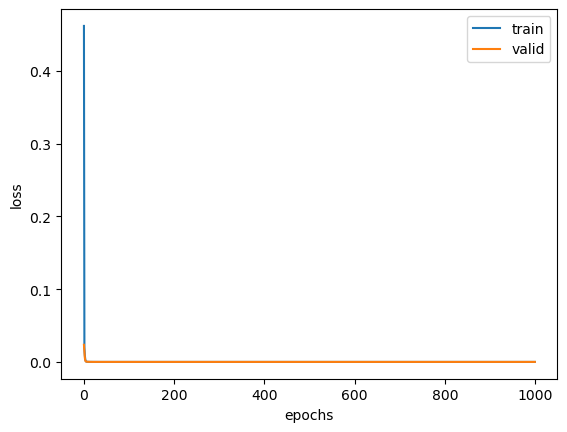

In [132]:
# Plotting loss on training and validation data set
plt.plot(train_loss_arr)
plt.plot(valid_loss_arr)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train", "valid"])

In [133]:
# (not so) hidden tests - DO NOT CHANGE THIS CELL

assert train_loss_arr[-1] < 0.1, "Try to optimise your model such that the training loss is < 0.1."
assert valid_loss_arr[-1] < 0.1, "Try to optimise your model such that the validatoin loss is < 0.1."

print("Test passed.")

Test passed.
